<a href="https://colab.research.google.com/github/THANHDAT202/CNN/blob/main/CNN_flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten

from keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
import os
from keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
from tensorflow.keras.utils import to_categorical


In [ ]:
# Khai báo đường dẫn tới thư mục chứa dữ liệu
data_dir = '/content/drive/MyDrive/BT1/data_hoa'


In [ ]:
# Tạo các tập train, validation và test bằng cách sử dụng ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # Chia dữ liệu thành tập train và validation


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training') # Lấy tập train từ tập chia theo validation_split


Found 120 images belonging to 5 classes.


In [ ]:
valid_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation') # Lấy tập validation từ tập chia theo validation_split


Found 30 images belonging to 5 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False) # Không shuffle tập test
  

Found 150 images belonging to 5 classes.


In [ ]:
train_generator.class_indices
test_generator.class_indices
valid_generator.class_indices


{'hoa_cuc': 0, 'hoa_hong': 1, 'hoa_mai': 2, 'hoa_sen': 3, 'hoa_sung': 4}

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout,Flatten,Conv2D, MaxPooling2D, Normalization         #dense :full conected ANN
from keras.layers import LeakyReLU
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(5, activation='softmax')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 26, 26, 128)     

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Huấn luyện mô hình với các tập train và validation được chia trên
train=model.fit(train_generator, epochs=10, validation_data=valid_generator)

Epoch 1/10
4/4 [==============================] - 129s 6s/step - loss: 3.6253 - accuracy: 0.3500 - val_loss: 2.2940 - val_accuracy: 0.4667
Epoch 2/10
4/4 [==============================] - 24s 6s/step - loss: 1.3143 - accuracy: 0.5667 - val_loss: 1.3583 - val_accuracy: 0.4333
Epoch 3/10
4/4 [==============================] - 22s 6s/step - loss: 1.1378 - accuracy: 0.5083 - val_loss: 1.0299 - val_accuracy: 0.5667
Epoch 4/10
4/4 [==============================] - 24s 5s/step - loss: 0.7884 - accuracy: 0.6667 - val_loss: 0.9451 - val_accuracy: 0.7000
Epoch 5/10
4/4 [==============================] - 23s 6s/step - loss: 0.5879 - accuracy: 0.7667 - val_loss: 1.0250 - val_accuracy: 0.7333
Epoch 6/10
4/4 [==============================] - 22s 6s/step - loss: 0.4873 - accuracy: 0.7750 - val_loss: 1.1862 - val_accuracy: 0.7000
Epoch 7/10
4/4 [==============================] - 24s 6s/step - loss: 0.3226 - accuracy: 0.8917 - val_loss: 1.2786 - val_accuracy: 0.7667
Epoch 8/10
4/4 [=================

In [ ]:
test_loss,test_acc = model.evaluate(train_generator)
print('độ chính xác trên tập kiểm tra', test_acc)
print('hàm mất mát trên tập kiểm ta', test_loss)


4/4 [==============================] - 7s 2s/step - loss: 0.1666 - accuracy: 0.9333
độ chính xác trên tập kiểm tra 0.9333333373069763
hàm mất mát trên tập kiểm ta 0.16662880778312683


In [ ]:
#lưu
from keras.models import load_model
model.save("Hoa(CNN).h5")
model_1=load_model('Hoa(CNN).h5')


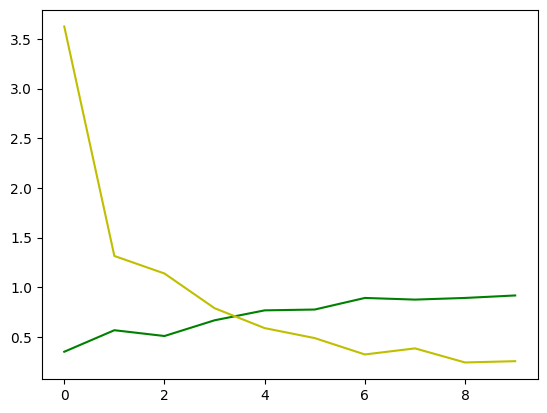

In [ ]:
import matplotlib.pyplot as plt      
accuracy = train.history['accuracy']
loss = train.history['loss']    
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'g',label = 'Training accuracy')
plt.plot(epochs,loss,'y',label = 'Training loss')
plt.show()


In [3]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded=files.upload()

for fn in uploaded.keys():
  #predicting images
  path='/content/'+fn
  #In ảnh đọc được
  plt.imshow(mpimg.imread(path))

  img=image.load_img(path,target_size=(224,224))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=10)
  label=['Hoa cuc','Hoa hong','Hoa mai','Hoa sen','Hoa sung']
  print(y_predict)
  print('Giá trị dự đoán: ', label[np.argmax(y_predict)])